In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import helper_functions as hf
from scipy import signal

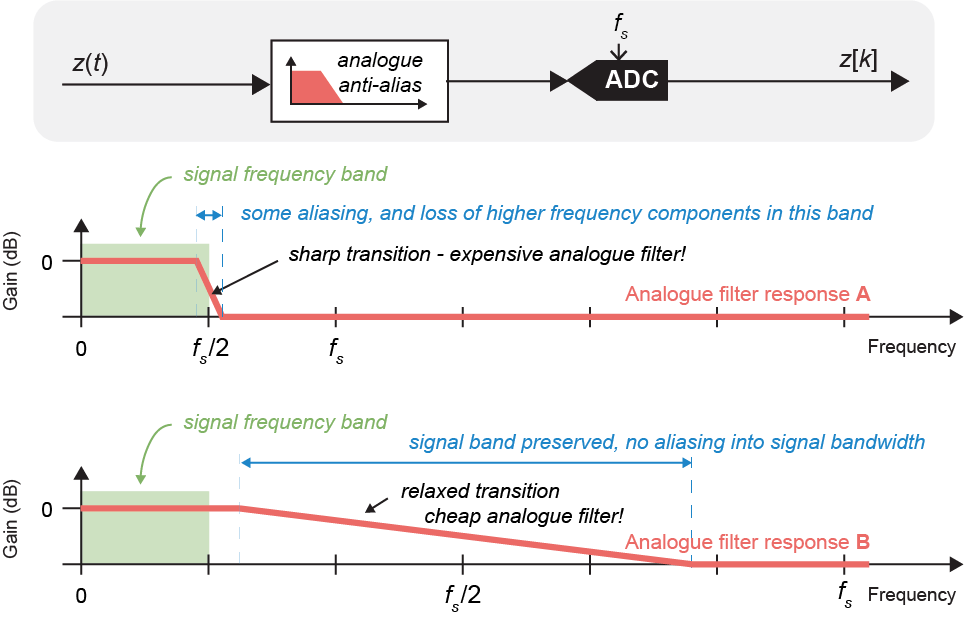

## 1. Aliasing

Consider a sine wave with frequency content as 50 Hz and 240 Hz and some noise contents

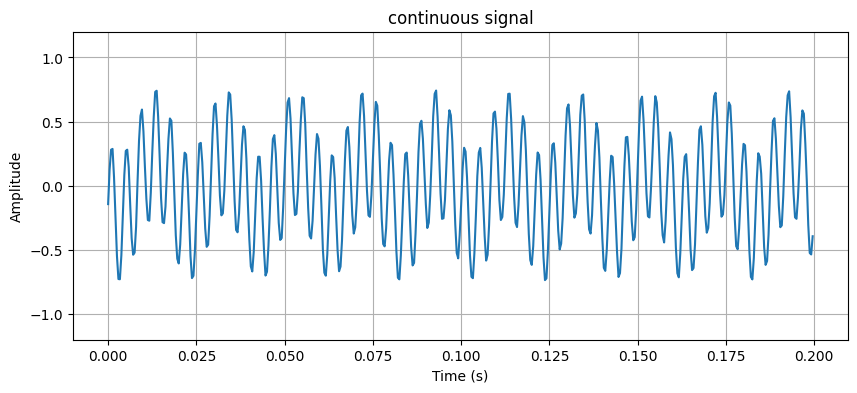

In [8]:
Aa = 0.25 # Amplitude a
Ab = 0.5  # Amplitude b

fa = 50     # desired frequency a
fb = 240    # desired frequency b

t = 0.2

fs_cont = 2400  #sampling frequency of the continuous waveform

#define continuous waveform for comparison
x_cont = np.arange(0, t, 1/fs_cont)
N_cont = np.size(x_cont)
noise = np.random.normal(0, 0.01, N_cont)
y_cont = Aa * np.sin(2*np.pi*fa*x_cont + 10) + Ab * np.sin(2*np.pi*fb*x_cont) + noise

# Plot the continuous signal
hf.plot_timeseries("continuous signal",
                   [x_cont],[y_cont],
                   ['continuous'])


Compute the log scale power of the continuous signal

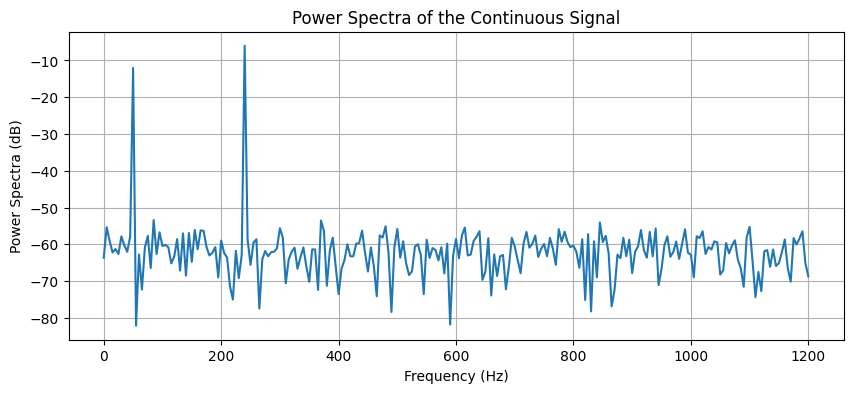

In [9]:
# Compute the log scale power of the continuous signal
Y_cont = np.fft.fft(y_cont)
Y_cont_norm = np.abs(Y_cont)*2/N_cont
Y_cont_log = 20*np.log10(Y_cont_norm)

# Plot the log scale power spectra
fig = plt.figure(figsize=(10,4))
axes = fig.add_subplot(1, 1, 1)
axes.plot(np.arange(0, N_cont//2 + 1)*fs_cont/N_cont, Y_cont_log[0:N_cont//2+1])
axes.set_title('Power Spectra of the Continuous Signal')
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Power Spectra (dB)')
axes.grid(True, 'Major')


We will sample the 'continuous' signal using a sampling frequency of 200Hz. According to Nyquist Sampling Theorem, all frequencies above half the sampling rate will alias

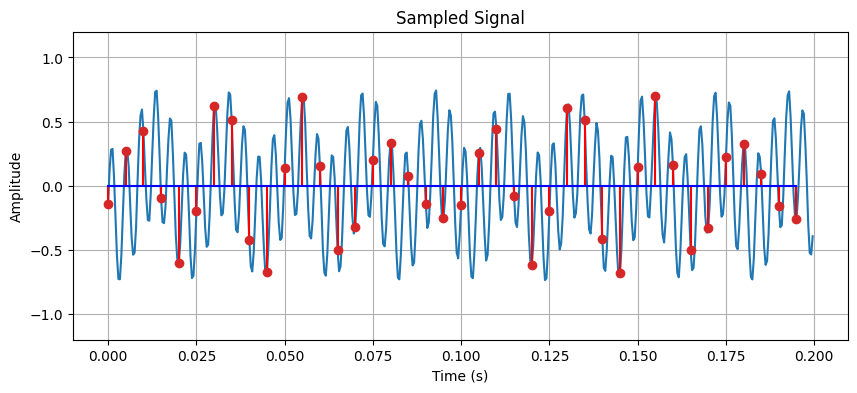

In [10]:
# Sampled signal
fs = 200
x = np.arange(0, t, 1/fs)   # Discrete time i.e. sampled time period
N = np.size(x)
y = y_cont[0::fs_cont//fs]  # Get sampled signal

# Plot the sampled signal
hf.plot_timeseries("Sampled Signal",
                   [x_cont, x], [y_cont, y], 
                   ['continuous','discrete'])

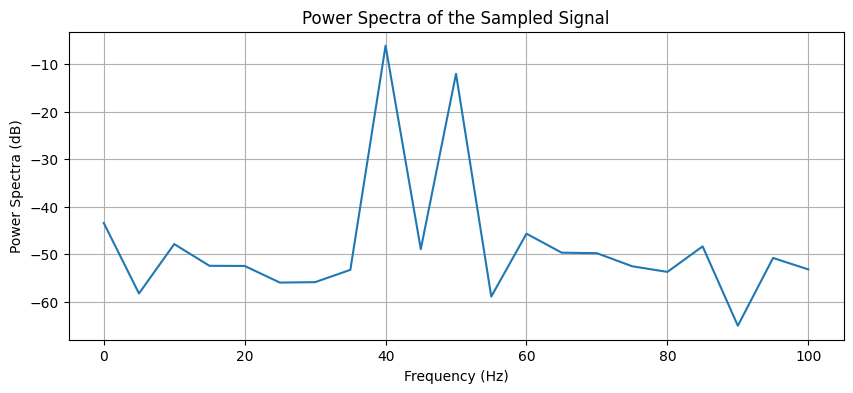

In [12]:
# Compute the sampled signal's log-scale power spectra
Y = np.fft.fft(y)
Y_norm = np.abs(Y)*2/N
Y_log = 20*np.log10(Y_norm)

# Plot the log-scale power spectra of the sampled signal
fig = plt.figure(figsize=(10,4))
axes = fig.add_subplot(1, 1, 1)
axes.plot(np.arange(0, N//2+1)*fs/N, Y_log[0:N//2+1])
axes.set_title('Power Spectra of the Sampled Signal')
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Power Spectra (dB)')
axes.grid(True, 'Major')

### 2. Anti-Aliasing Filter
An anti-alias filter is used before the 'continuous' signal is sampled by the ADC. The purpose of the filter is to suppress frequencies above the Nyquist Sampling rate.

In [22]:
# A simple function to generate a lowpass filter
def generate_lowpass(fs, cutoff, stop, numtaps):
    taps = signal.remez(numtaps, [0, cutoff, stop, 0.5*fs], [1, 0], fs=fs)
    w, h = signal.freqz(taps, [1], worN=2000)
    return w, h, taps

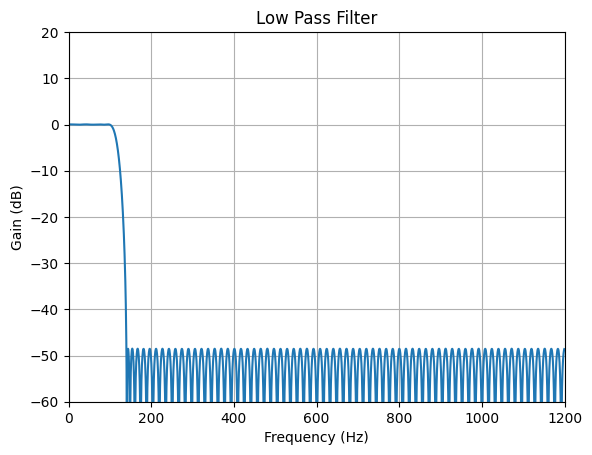

In [23]:
numtaps = 151
w, h, coeffs = generate_lowpass(fs_cont, fs/2, 1.4*(fs/2), numtaps)
hf.plot_response(fs_cont, w, h, title="Low Pass Filter")

The low pass filter is convolved with the sontinuous signal

In [26]:
# Filter the 'continuous' signal
y_cont_anti = signal.filtfilt(coeffs, 1, y_cont)

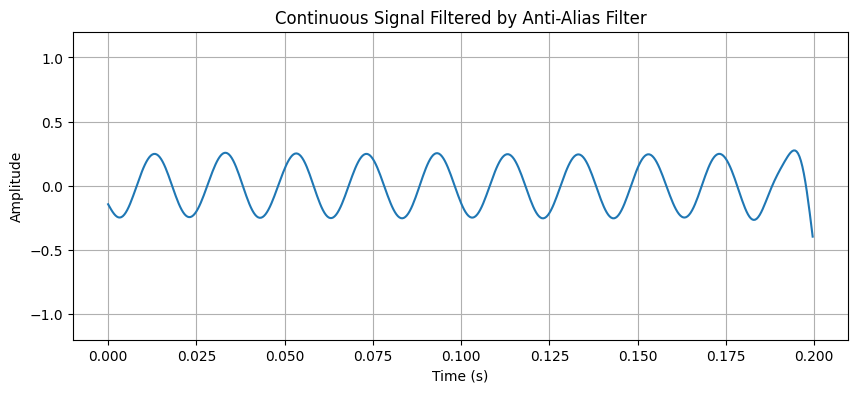

In [27]:
# Plot the 'continuous' signal filtered by the anti-alias filter
hf.plot_timeseries("Continuous Signal Filtered by Anti-Alias Filter",
                   [x_cont], [y_cont_anti],
                   ['continuous'])